In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from  tensorflow.keras.preprocessing.image import ImageDataGenerator


In [19]:
import tensorflow as tf
# import keras_preprocessing
from tensorflow.keras.preprocessing import image
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "../input/hindi-done/DevanagariHandwrittenCharacterDataset/Hindi_Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "../input/hindi-done/DevanagariHandwrittenCharacterDataset/Hindi_Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(64,64),
  color_mode="grayscale",
	class_mode='categorical',
  batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(64,64),
   color_mode="grayscale",
	class_mode='categorical',
  batch_size=128
)

model = tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=80, steps_per_epoch=(30600)/128, validation_data = validation_generator, verbose = 1, validation_steps=(5400)/128)

model.save("rps.h5")

Found 30600 images belonging to 18 classes.
Found 5400 images belonging to 18 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 128)         0         
_________________________________

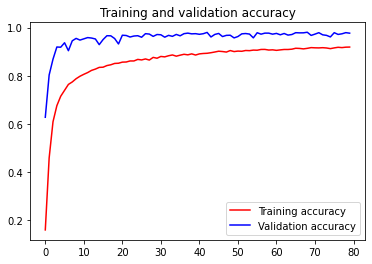

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()